# The Utility code
## This code helps in analysing the scenarios record and display the required results.

### CARLA Location and Connection information
>#### Note: The Jupyter notebook should be run from the mlmas environment.
>#### Make sure that the CARLA simulator is running.

In [7]:
# Specify the carla location and IP to connect with.
import os

prj_dir = os.getcwd().replace('/MLMAS_Framework/tools','')

CARLA_PATH = prj_dir+'/CARLA_0.9.10.1'


HOST = '192.168.0.64'
PORT = 2000


### Import the required libraries

In [8]:
# run this code and make sure CARLA simulator is running

import glob

import sys
import pandas as pd
import json

try:
    sys.path.append(glob.glob(CARLA_PATH+'/PythonAPI/carla/dist/carla-0.9.10-py3.7-linux-x86_64.egg')[0])
except IndexError:
    print("error >>>")

import carla

client = carla.Client(HOST, PORT)
client.set_timeout(60.0)

## 1. Configuration
### Record file path to analyse

In [9]:

def log_files():
    for i in range(36):
        yield f"MLMAS_tfus_RouteScenario_{i}_rep0.log"
        
        
        
scenarios = list(log_files())

recorder_filename = scenarios[0]
recorder_filename2 = prj_dir+'/results/records/MLMAS_tfus/RouteScenario_8_rep0.log'

In [10]:
TIME = 30
DISTANCE = 10
try:



    print(client.show_recorder_actors_blocked(recorder_filename, TIME, DISTANCE))

finally:
    pass


Version: 1
Map: Town01
Date: 06/20/24 22:07:23

    Time     Id Actor                                 Duration
       0    263 walker.pedestrian.0009                     507
       0    265 walker.pedestrian.0005                     465
       0    272 vehicle.diamondback.century                411
       0    273 vehicle.diamondback.century                360
       0    274 vehicle.diamondback.century                307
     386    273 vehicle.diamondback.century                146
     404    287 vehicle.volkswagen.t2                      128
     403    325 vehicle.tesla.cybertruck                   116
     425    289 vehicle.audi.etron                         103
       0    270 walker.pedestrian.0021                     102
     418    303 vehicle.chevrolet.impala                    99
     420    351 vehicle.chevrolet.impala                    98
     410    313 vehicle.gazelle.omafiets                    98
     435    350 vehicle.nissan.patrol                       94
     43

## 2. Analysing the Record Logs

### - List of the possible blocked agents cases in this scenario:

### - List of all collission cases in this scenario

In [11]:
try:

    print(client.show_recorder_collisions(sc, "v", "a"))

finally:
    pass

Version: 1
Map: Town01
Date: 06/20/24 22:07:23

    Time  Types     Id Actor 1                                 Id Actor 2                            
     107   v w     259 vehicle.lincoln.mkz2017                270 walker.pedestrian.0021             

Frames: 10656
Duration: 533 seconds



## 3. Run the Scenario in a Specific Period
### - Baseed on the above code information specify the following:
in the replay_file method replay_file(record_filename, start_sec, end_sec, camera_actor_id):
- start_sec: From which second you want to start the scenario (eg. you want to start 3 sec before the collision happen based on the previous code information)
- duration: Which second you want the scenario to stop.
- camera_actor_id: based on the previous code information, you can get the id of the vehicle you want to follow, and specify it in this argument. however, if the id is invalud, the camera will be always shows from top. (By default configured to get the id of the hero-car that controlled by the model)

In [12]:
## Change the start time and the duration for the scenario to rerun in the specify period.
Start_Time = 100
Duration = 533
p = "2"
def get_hero_vehicle(client):
    try:
        act_list = client.show_recorder_file_info(recorder_filename, False).splitlines()
        
        for i in range(len(act_list)):
                if "role_name = hero" in act_list[i]:
                    s = act_list[i-5]
                    s = s[7:s.find(':')]
                    print(s)
                    return int(s)

    finally:
        pass
try:

    client.reload_world()
    client.replay_file(recorder_filename,
                       time_start=Start_Time,
                       duration=Duration,
                       follow_id = get_hero_vehicle(client))

finally:
    pass


 259


In [13]:
## Change the start time and the duration for the scenario to rerun in the specify period.
Start_Time = 230
Duration = 3000
p = "2"
def get_hero_vehicle(client):
    try:
        act_list = client.show_recorder_file_info(recorder_filename2, False).splitlines()
        
        for i in range(len(act_list)):
                if "role_name = hero" in act_list[i]:
                    s = act_list[i-5]
                    s = s[7:s.find(':')]
                    return int(s)

    finally:
        pass
try:
    
    client.reload_world()
    client.replay_file(recorder_filename2,
                       time_start=Start_Time,
                       duration=Duration,
                       follow_id = get_hero_vehicle(client))

finally:
    pass


ArgumentError: Python argument types in
    Client.replay_file(Client, str)
did not match C++ signature:
    replay_file(carla::client::Client {lvalue}, std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > name, double time_start, double duration, unsigned int follow_id)

In [ ]:
### =================== End Of Scenario Runner ===================

# Results Statistics

## 1. configuration
### Configure of the results files location

In [14]:
mlmas_leaderboard_results_file = os.getcwd().replace('/MLMAS_Framework/tools','/results_tfuse_agent/MLMAS_tfus_results.json')
mlmas_additional_metrics_file = os.getcwd().replace('/MLMAS_Framework/tools','/results_tfuse_agent/MLMAS_tfus_results_jason_metrics.csv')
lav_leaderboard_results = os.getcwd().replace('/MLMAS_Framework/tools','/results_LAV_agent/MLMAS_LAV_results.json')


### Load the files

In [15]:
def loadLeaderboardJson(filepath):
    f = open(os.path.realpath(filepath))
    return json.load(f)
    

def geLeaderboardMetrics(jsn):
    leaderboard_metrics = jsn['values']
    leaderboard_df = pd.DataFrame([jsn['values']],
                                  columns=jsn['labels'])
    leaderboard_df = leaderboard_df.astype(float)
    
    return leaderboard_df



mlmas_leaderboard_jsn = loadLeaderboardJson(mlmas_leaderboard_results_file)
lav_leaderboard_jsn = loadLeaderboardJson(lav_leaderboard_results)


## 2. Display the leaderboard results

In [16]:
mlmas_leaderboard_df = geLeaderboardMetrics(mlmas_leaderboard_jsn)
lav_leaderboard_df = geLeaderboardMetrics(lav_leaderboard_jsn)
display(mlmas_leaderboard_df)
print("== MLMAS Framework with LAV Model Leaderboard Metrics results ==")
print("== ========================================================== ==")
display(lav_leaderboard_df)
print("== LAV Model Only Leaderboard Metrics results ==")

,Avg. driving score,Avg. route completion,Avg. infraction penalty,Collisions with pedestrians,Collisions with vehicles,Collisions with layout,Red lights infractions,Stop sign infractions,Off-road infractions,Route deviations,Route timeouts,Agent blocked
0,51.834,97.192,0.53,0.009,0.283,0.022,0.035,0.209,0.011,0.0,0.017,0.022


== MLMAS Framework with LAV Model Leaderboard Metrics results ==
== ========================================================== ==


,Avg. driving score,Avg. route completion,Avg. infraction penalty,Collisions with pedestrians,Collisions with vehicles,Collisions with layout,Red lights infractions,Stop sign infractions,Off-road infractions,Route deviations,Route timeouts,Agent blocked
0,0.886,1.011,0.984,0.0,0.0,0.0,0.045,0.0,0.366,0.32,0.0,23023.212


== LAV Model Only Leaderboard Metrics results ==


In [17]:
def mergeTwoLeaderbordMetricsResults(title1, title2, df1, df2):
    score_columns = df1.columns.values[0:3]
    df_s1 = df1[score_columns]
    df_s1.loc[:,2:3] = df_s1[score_columns[2]].values*100
    df_s2 = df2[score_columns]
    df_s2.loc[:,2:3] = df_s2[score_columns[2]].values*100
    
    collisions_columns = df1.columns.values[3:6]
    
    road_columns = df1.columns.values[6:9]
    
    other_columns = df1.columns.values[9:]
    
    final_df_s = pd.DataFrame({title1: df_s1.values[0]
                  , title2: df_s2.values[0]
                  , 'Results_Higher_is_Better': score_columns}) 
    
    final_df_c = pd.DataFrame({title1: df1[collisions_columns].values[0]
          , title2: df2[collisions_columns].values[0]
          , 'Results_Lower_is_Better': collisions_columns}) 
    
    final_df_r = pd.DataFrame({title1: df1[road_columns].values[0]
              , title2: df2[road_columns].values[0]
              , 'Results_Lower_is_Better': road_columns}) 
    
    final_df_o = pd.DataFrame({title1: df1[other_columns].values[0]
          , title2: df2[other_columns].values[0]
          , 'Results_Lower_is_Better': other_columns}) 
        
        
    final_df_s.index = final_df_s.Results_Higher_is_Better
    final_df_c.index = final_df_c.Results_Lower_is_Better
    final_df_o.index = final_df_o.Results_Lower_is_Better
    final_df_r.index = final_df_r.Results_Lower_is_Better
    return final_df_s, final_df_c, final_df_o, final_df_r

def show_values(g, pr="%", is_vertical = True):
    for p in g.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        if is_vertical:
            g.annotate(f'{round(height,1)}{pr}' if pr == "%" else f'{height}{pr}', (x + width/2, y + height*1.02), ha='center')
        else:
            g.annotate(f'{width}{pr}', (x + width + 0.09, y + height/2), ha='center')



/home/ddmonster/miniconda3/envs/mlmas/lib/python3.7/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)
/home/ddmonster/miniconda3/envs/mlmas/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/ddmonster/miniconda3/envs/mlmas/lib/python3.7/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

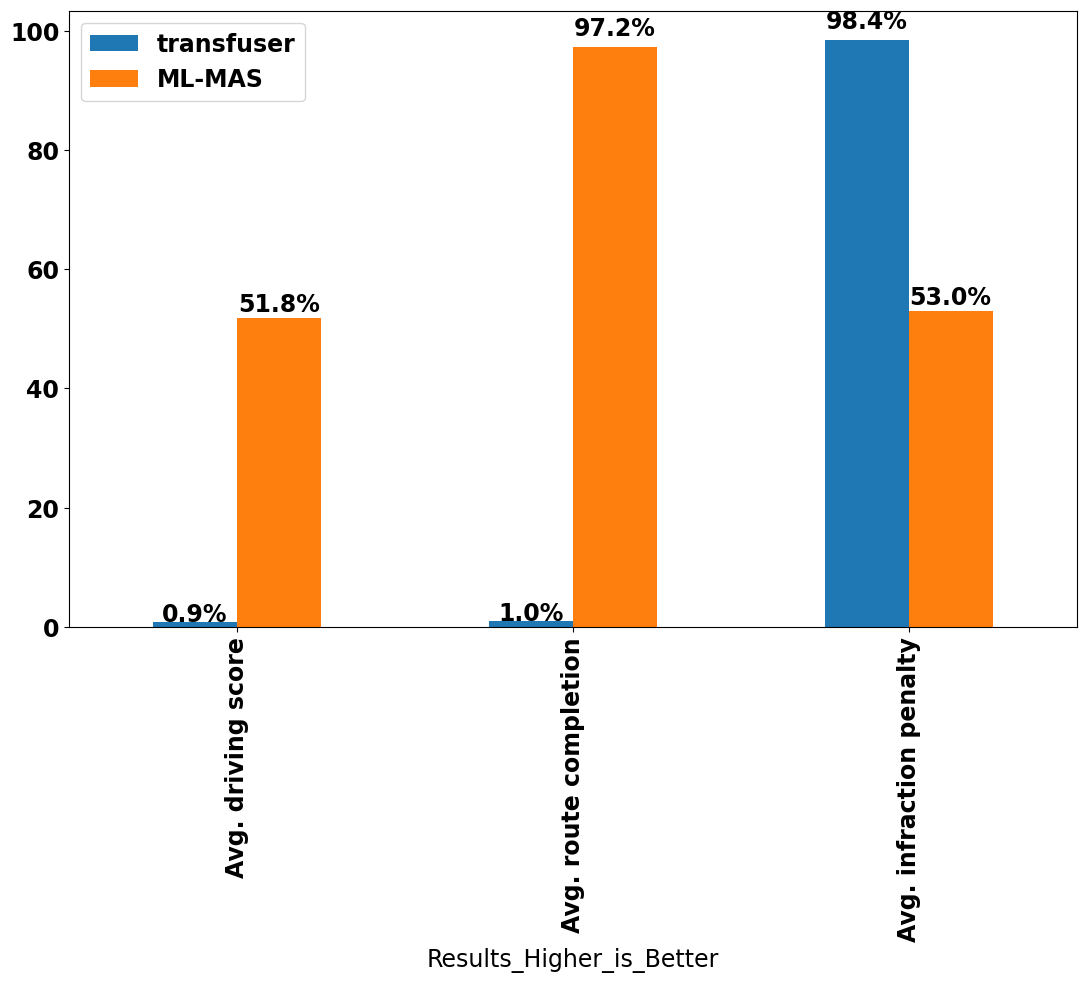

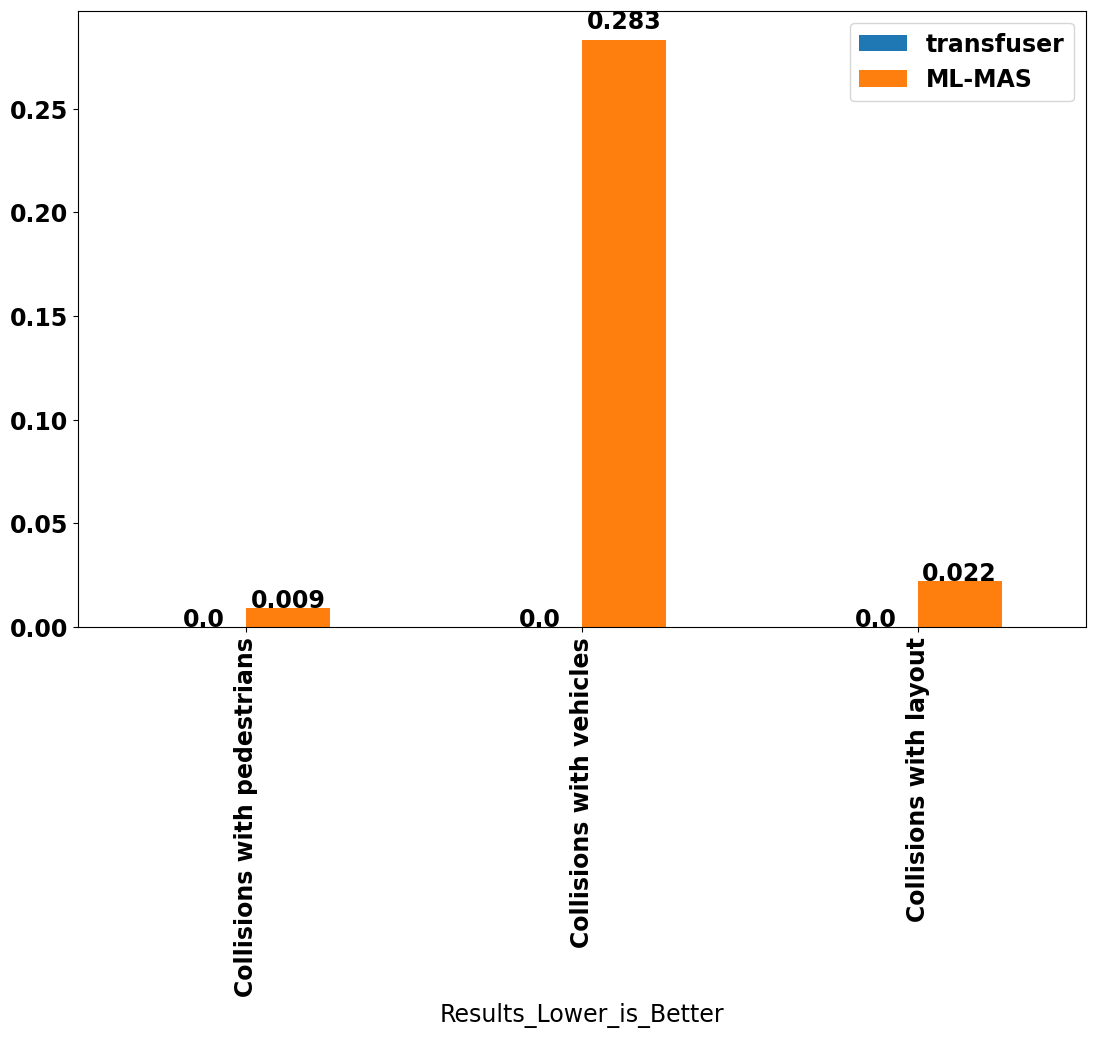

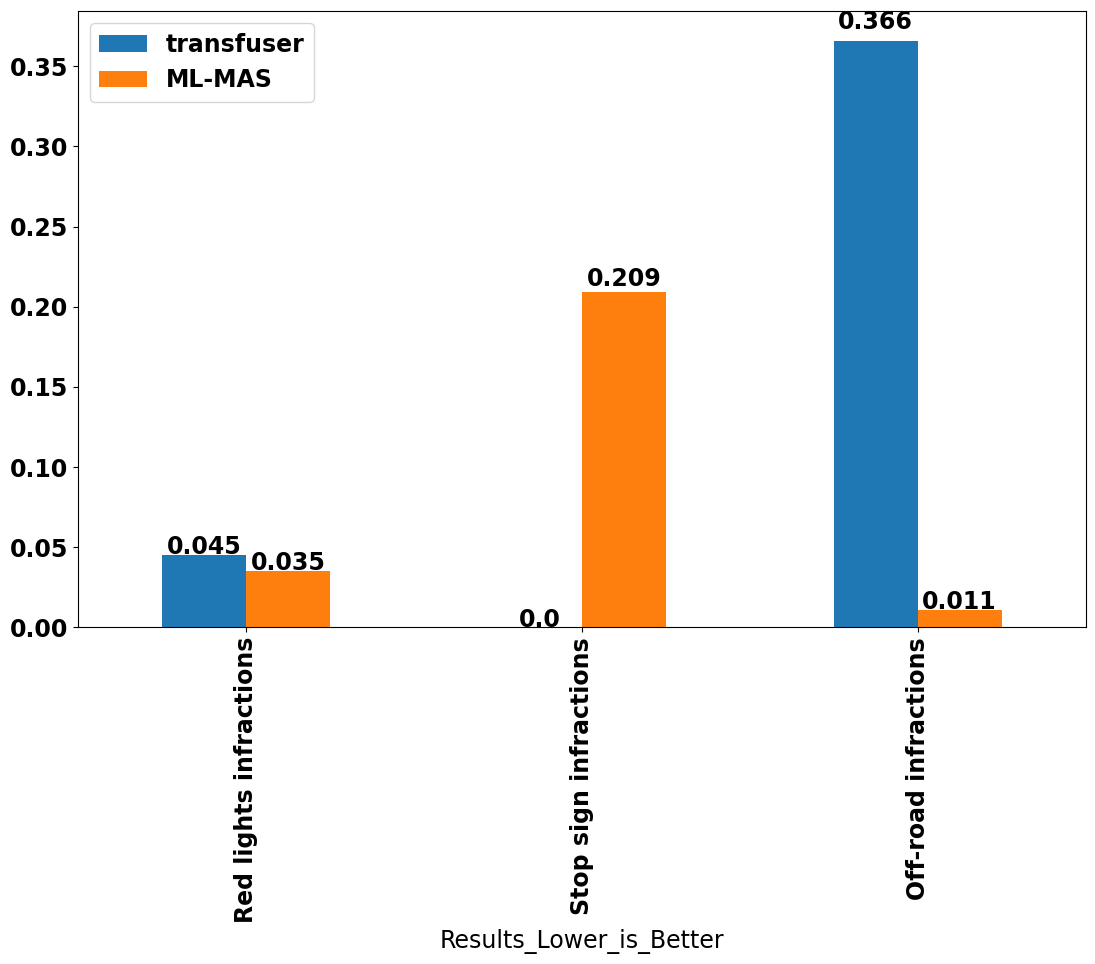

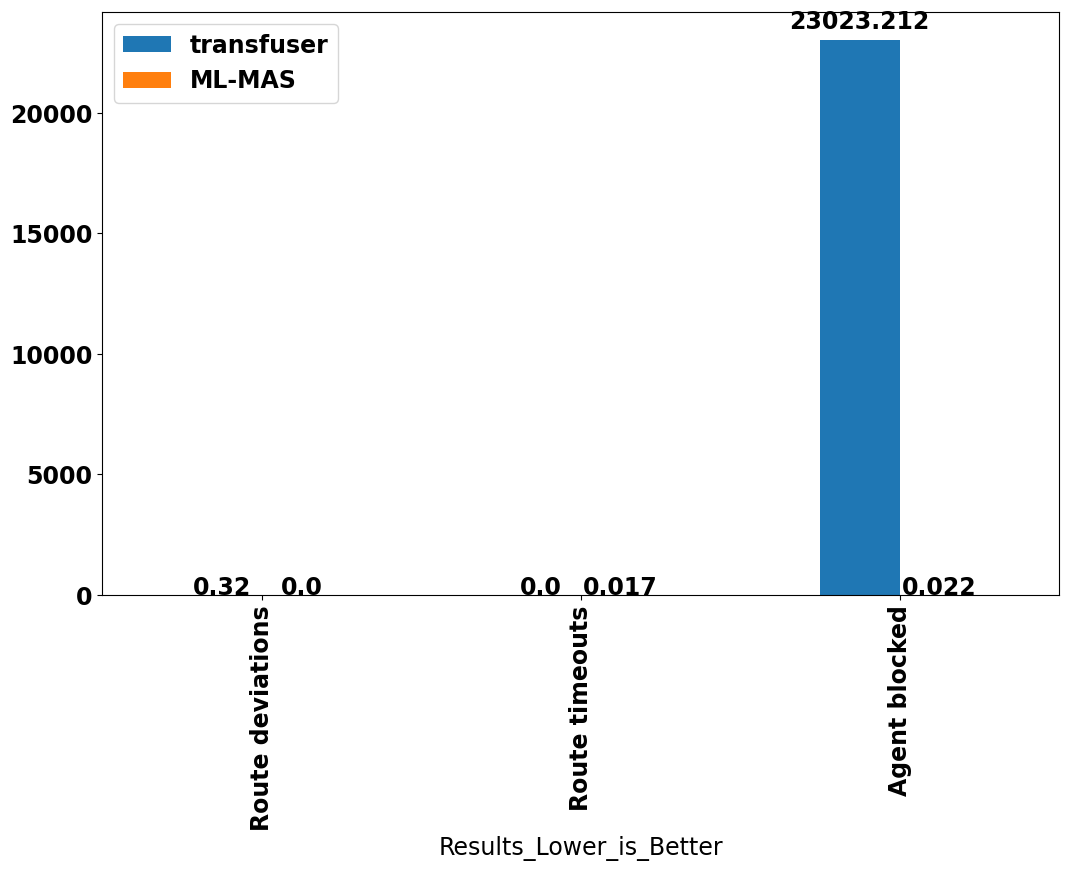

In [18]:
import matplotlib.pyplot as plt
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 17}

plt.rc('font', **font)


final_df_s, final_df_c, final_df_o, final_df_r = mergeTwoLeaderbordMetricsResults('transfuser','ML-MAS', lav_leaderboard_df ,mlmas_leaderboard_df)
graph = final_df_s.plot.bar(figsize=(13,8))

graph2 = final_df_c.plot.bar(figsize=(13,8))
graph3 = final_df_r.plot.bar(figsize=(13,8))
graph4 = final_df_o.plot.bar(figsize=(11,9))

plt.tight_layout()
show_values(graph)
show_values(graph2, pr="")
show_values(graph3, pr="")
show_values(graph4, pr="")

## 3. Jason Agent Additional Metrics

In [ ]:
jason_metrics_csv = pd.read_csv(mlmas_additional_metrics_file, delimiter=';')

final_columns = jason_metrics_csv.columns.values
final_columns[6], final_columns[7] = final_columns[7], final_columns[6]

jason_metrics_csv = jason_metrics_csv[final_columns]
additional_metrics_columns = ["Total Frames", 
                              "Front \nCollision Avoidance",
                             "Far Crossing \nCollision Avoidance",
                             "Close Crossing \nCollision Avoidance",
                             "Back \nCollision Avoidance",
                             "Traffic Light \nGreen [Go]",
                             "Traffic Light \nSlowdown",
                             "Traffic jam \ninterference"]
jason_metrics_csv.columns = additional_metrics_columns

print("== The additional Jason Agent metrics in each scenario")
jason_metrics_csv

## Summary of the additional metrics

In [ ]:
jason_metrics_csv.describe()

In [ ]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 17}

plt.rc('font', **font)

mean_percentage = round(jason_metrics_csv.describe()*100,1)
mean_percentage = mean_percentage[additional_metrics_columns[1:]][1:2].values[0]
final_df_s = pd.DataFrame({'Interference_Percentage': mean_percentage
                  , 'Interference_Type': additional_metrics_columns[1:]}) 

final_df_s.index = final_df_s.Interference_Type
final_df_s = final_df_s.sort_values(by=["Interference_Percentage"])
graph = final_df_s.plot.barh(figsize=(13,13))
graph.set_title("Average Jason Agent Interference Percentage of the Whole Evaluation Time")
show_values(graph, is_vertical= False)

print("Total Average Agent Interferance Percentage: (%.1f%s)"%(mean_percentage.sum(),"%"))

In [ ]:

total_df = pd.DataFrame({"Models":["ML-Model","(BDI) Agent"], "Contribution": [100 - mean_percentage.sum(), mean_percentage.sum()]})
total_df.index = total_df.Models

plot = total_df.plot.pie(y='Contribution', title="The ML-Model vs (BDI) Agent Contribution", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0.1), \
                   shadow=True, 
                         startangle=-4,figsize=(8, 8))
